# Predict the Rent of House in Dhaka City by Applying Machine Learning Techniques

#### Contributor
- Md. Saif Ahammod Khan
- Rasheeq Ishmam
- S. M. Sajid Hasan Shanta


#### Flowchart

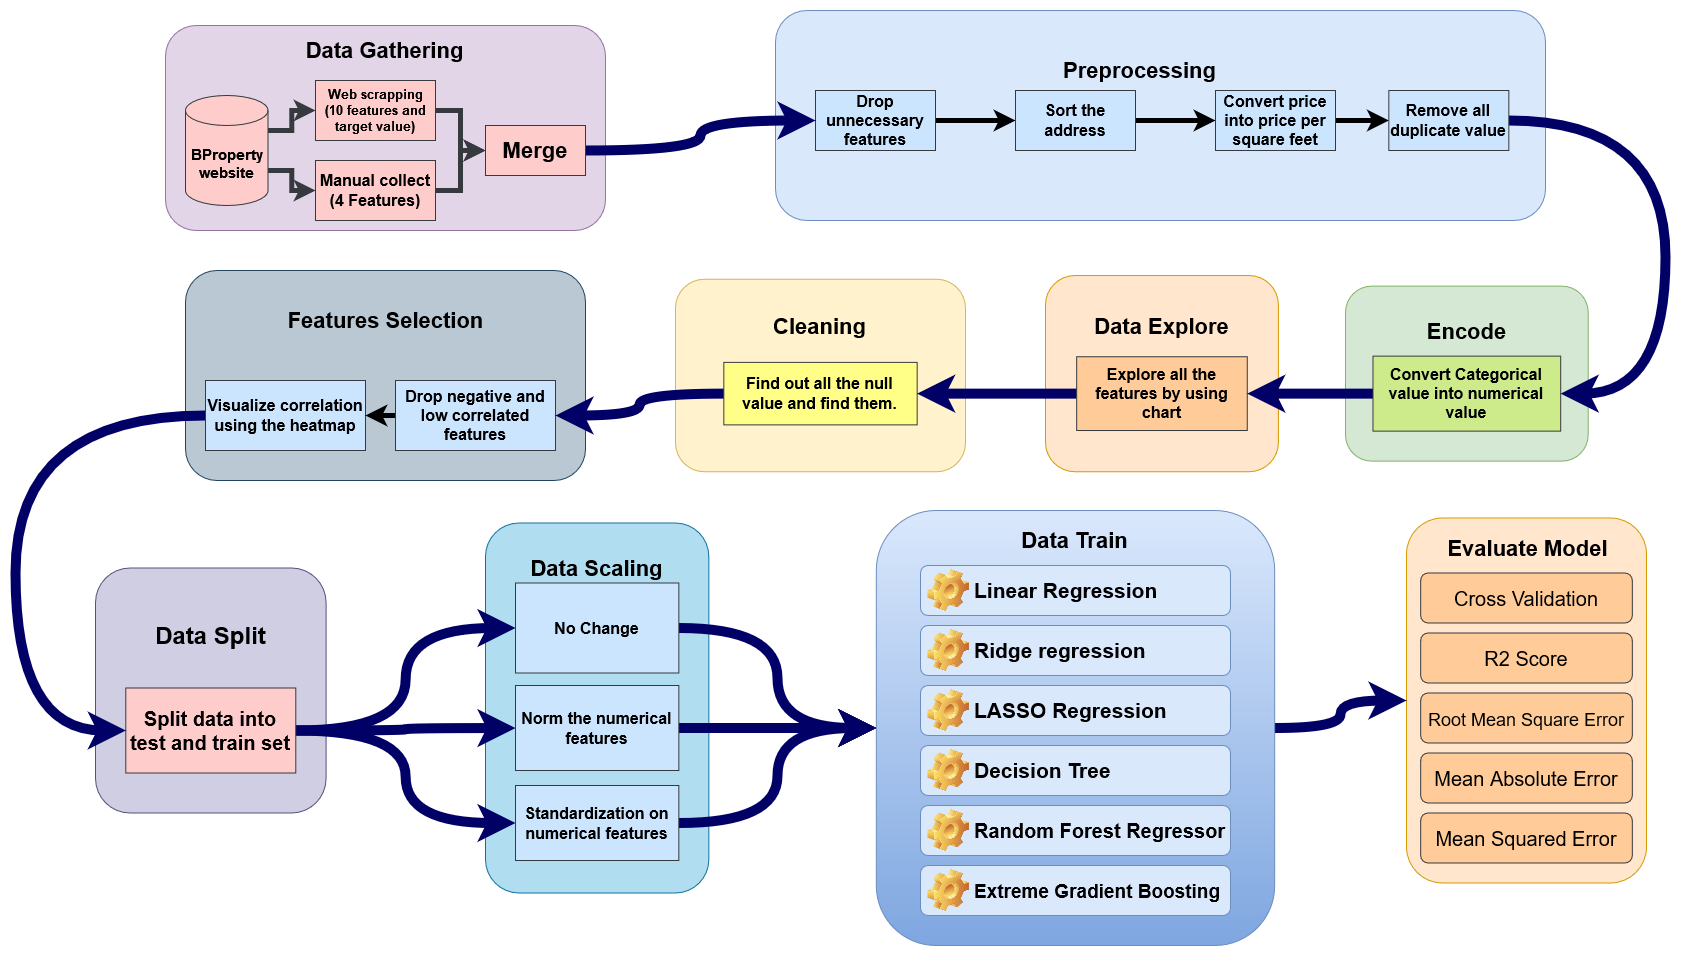

In [9]:
from IPython.display import Image
Image(filename = "Flow Chart of house Rent prediction.drawio.png", width=900, height=900)

### Import liberary

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv
%matplotlib inline

### 1. Data Set 
We have collected two dataset from Bproperties
1. In BpropertyManualData.csv dataset we collected manually nearby educational istitute,Medical Service, Park and Resturent Information.
2. In BpropertyWebScrapping.csv We collected akk the house location in dhaka city

After Collecting all these two dataset we marged them and made a one singel dataset named "Primarydata"

#### Loading Manual Data

In [11]:

Manual_data = pd.read_csv('BpropertyManualData.csv') # raw_data is the panda's dataframe

# print the shape
print(Manual_data.shape)

#runs the first 5 rows
Manual_data.head()

(896, 5)


,Address,Educational Institute,Restaurants,Medical Service,Parks
0,"1st Colony, Mirpur, Dhaka",28.0,12.0,24.0,16.0
1,"22 Bari, West Kazipara, Mirpur, Dhaka",47.0,50.0,6.0,18.0
2,"2nd Colony, Mirpur, Dhaka",15.0,24.0,2.0,13.0
3,"2nd Lane, Gopibag, Motijheel, Dhaka",9.0,15.0,1.0,17.0
4,"3rd Colony, Mirpur, Dhaka",24.0,29.0,5.0,12.0


#### Loading Web Scrapping Data

In [12]:
Webscrapped_data = pd.read_csv('BpropertyWebScrapping.csv')

# print the shape
print(Webscrapped_data.shape)

#runs the first 5 rows
Webscrapped_data.head()

(38189, 11)


,Brief,Link,Price,Address,Type,Details,Beds,Baths,Size,Image Link,Image Link 2
0,"{""@context"":""https://schema.org"",""@type"":""Apar...",https://www.bproperty.com/en/property/details-...,45000,"Dhanmondi, Dhaka",Apartment,1616 Sq Ft Nice Apartment Is For Rent In Dhanm...,3.0,3.0,1616,NaN,NaN
1,"{""@context"":""https://schema.org"",""@type"":""Apar...",https://www.bproperty.com/en/property/details-...,25000,"Block I, Bashundhara R-A, Dhaka",Apartment,A Must See This Apartment For Rent Is All Set ...,3.0,4.0,1500,NaN,NaN
2,"{""@context"":""https://schema.org"",""@type"":""Resi...",https://www.bproperty.com/en/property/details-...,150000,"Sector 3, Uttara, Dhaka",Building,A 4500 Square Feet Full Building Ready For Ren...,5.0,5.0,4500,NaN,NaN
3,"{""@context"":""https://schema.org"",""@type"":""Apar...",https://www.bproperty.com/en/property/details-...,45000,"Block F, Bashundhara R-A, Dhaka",Apartment,Tastefully Designed This 3-Bedroom Apartment I...,3.0,3.0,1850,NaN,NaN
4,"{""@context"":""https://schema.org"",""@type"":""Apar...",https://www.bproperty.com/en/property/details-...,48000,"Sector 3, Uttara, Dhaka",Apartment,2700 Sq Ft Apartment Is Ready For Rent In Uttara,4.0,4.0,2700,"<source type=""image/webp"" srcSet=https://image...","<source type=""image/webp"" srcSet=https://image..."


#### Merge Both Dataset

In [13]:

Primarydata = pd.merge(Webscrapped_data,Manual_data)
print(Primarydata.shape)
Primarydata.columns



(38189, 15)


Index(['Brief', 'Link', 'Price', 'Address', 'Type', 'Details', 'Beds', 'Baths',
       'Size', 'Image Link', 'Image Link 2', 'Educational Institute',
       'Restaurants', 'Medical Service', 'Parks'],
      dtype='object')

"Primarydata" Now our primary dataset is ready now it is time for some preprocessing and drop all the unnecessary data like image link, large catagorical details etc.

### 2. Preprocessing
Here we have droped the following unnecessary features and we have sorted the address a little bit.

- Brief 	
- Link
- Details
- Image Link
- Image Link 2

#### Droping The Unnecessary Features

In [14]:
Primarydata=Primarydata.drop(labels=['Brief','Link','Details','Image Link','Image Link 2'], axis=1)
Primarydata.columns

Index(['Price', 'Address', 'Type', 'Beds', 'Baths', 'Size',
       'Educational Institute', 'Restaurants', 'Medical Service', 'Parks'],
      dtype='object')

#### Making the adress more simple

In [15]:
list_add = []
for i in range(0,38189):
    list01 = list(Primarydata['Adress'][i].split(", "))
    list_add.append(list01)

l_main = []
for i in list_add:
     l_main.append(i[len(i)-2])
Primarydata['Adress'] = l_main
Primarydata

KeyError: 'Adress'

#### Remove Duplicate Values

In [ ]:
Primarydata.dropna(inplace = True)
Primarydata.drop_duplicates(inplace = True)
print(Primarydata.shape)
Primarydata

Preprocing of data is complete. Now it is time for Encode

### 3. Data Encode

- We have converted all the catagorical value from the dataframe into numerical value.

In [ ]:
EncodedData=Primarydata.copy()

#### In the dataframe only Type and address are catagorical. We are converting them into numerical value 

In [ ]:
EncodedData['Type']=pd.factorize(EncodedData['Type'])[0]
EncodedData['Adress']=pd.factorize(EncodedData['Adress'])[0]
EncodedData.describe()


Encoding of data is complete. Now it is time for Explore the data

### 4. Exploratory Data

Here we will explore all the features by using the following chart. At first we will visualize individual features and later on on we will visualize all of them together
We will use following chart to visualize all the features

1. Countplot
2. Boxplot
3. Distribution plot
4. Regplot


#### Using Countplot to visualize individual features

In [ ]:
#Count of Type of house
ax = plt.figure(figsize = (5,3))
sns.countplot(x ='Type', data = EncodedData)
plt.title("Type of houses")
plt.show()

Majority Houses are Apartment Type others are almost ignorable.

In [ ]:
#Count Number of Bedrooms
ax = plt.figure(figsize = (5,3))
sns.countplot(x ='Beds', data = EncodedData)
plt.title("Number of Bedrooms")
plt.show()

Majority Houses have 2 and 3 bedrooms only few have 1 and 4 bedrooms and 5 bedrooms is rare.

In [ ]:
#Count Number of Bathrooms
ax = plt.figure(figsize = (5,3))
sns.countplot(x ='Bath', data = EncodedData)
plt.title("Number of Bathrooms")
plt.show()

In [ ]:
#Count Number of Educational Institute
ax = plt.figure(figsize = (30,5))
sns.countplot(x ='Educational Institute', data = EncodedData)
plt.title("Number of Educational Institute")
plt.show()

In [ ]:
#Count Number of Parks
ax = plt.figure(figsize = (30,5))
sns.countplot(x ='Parks', data = EncodedData)
plt.title("Number of Parks")
plt.show()

In [ ]:
#Count Number of Restaurants
ax = plt.figure(figsize = (30,5))
sns.countplot(x ='Restaurants', data = EncodedData)
plt.title("Number of Restaurants")
plt.show()

.

In [ ]:
#Count Number of Medical Service
ax = plt.figure(figsize = (30,5))
sns.countplot(x ='Medical Service', data = EncodedData)
plt.title("Number of Medical Service")
plt.show()

#### Using Boxplot to visualize all Data

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in EncodedData.items():
    sns.boxplot(y=k, data=EncodedData, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Using Distplot to visualize all Data

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in EncodedData.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Price density visualizing using Distribution plot

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.distplot(EncodedData['Price'],hist_kws=dict(edgecolor='red' ,linewidth=3),color='green')

#### Visualize all the features against price using Reg plot

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against Price
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Type', 'Beds', 'Bath', 'Size', 'Educational Institute','Restaurants', 'Medical Service', 'Parks']
x = EncodedData.loc[:,column_sels]
y = EncodedData['Price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 5. Data Cleaning

- At first we cheacked if there are any missing value
- We counted all the missing values
- We replaced all the missing value with interpolation to find missing value with help of its neighbors

In [ ]:
CleanedData=EncodedData.copy()

#### Checking if there is any null value

In [ ]:
CleanedData.isnull().any()

#### Counting all the null value

In [ ]:
CleanedData.isnull().sum()

#### Using interpolation to find missing value

In [ ]:
CleanedData=EncodedData.interpolate()

#### Checking if there are any missing values

In [ ]:
CleanedData.isnull().sum()

### 6. Features Selection

#### Heat map where it is showing all the corelation between each and every features (Target value is also included)

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(CleanedData.corr(),annot=True,cmap='Blues')

#### Visualizing the co relation with price for selecting the features

In [ ]:
CleanedData.corrwith(CleanedData.Price).plot.bar(figsize=(20,10),title="Correlation with Price ",fontsize=15,rot=45,grid=True)

#### Dropping all the data which has less corelation on the price

In [ ]:
SelectedFeaturedData=CleanedData.drop(labels=['Adress','Educational Institute','Restaurants'], axis=1)
SelectedFeaturedData

### 7. Data Split
- At first we have stored all the features in X and the target value in Y
- We have selected 30% of data as a test set

#### Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

X = SelectedFeaturedData.drop(['Price'], axis=1)
y = SelectedFeaturedData.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Counting all the test and train data

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

### 8. Data Scaling
We scaled the data into two category
- Converted into norm
- Standardizied the values

#### Converting all the features into norm

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

#### Standardization of all values

In [ ]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Type', 'Beds', 'Bath', 'Size', 'Medical Service', 'Parks']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

### 9. Train Model and Evaluation of Model
We have used  six regression algorithms those are.
- Linear Regression
- Ridge regression
- LASSO Regression
- Decision Tree
- Random Forest Regressor
- Extreme Gradient Boosting

We have also used RMSE,MSE,MAE,R2 and Cross Validation to evaluate six regression algorithms.

#### 9.1 Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression #LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
regressor_linear = LinearRegression()

rmseL = []
mseL=[]
maeL=[]
r2L=[]
cv_linear=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
  regressor_linear.fit(trainX[i],y_train)
  pred = regressor_linear.predict(testX[i])
  rmseL.append(np.sqrt(mean_squared_error(y_test,pred)))
  mseL.append(mean_squared_error(y_test,pred))
  maeL.append(mean_absolute_error(y_test,pred))
  r2L.append(r2_score(y_test,pred))
  cv_linear.append(cross_val_score(estimator = regressor_linear, X = trainX[i], y = y_train, cv = 10))
# visualizing the result
df_Linear = pd.DataFrame({'Root Mean Square Error(RMSE-Linear)':rmseL},index=['Original','Normalized','Standardized'])
df_Linear1 = pd.DataFrame({'Mean Squared Error (MSE-Linear)':mseL},index=['Original','Normalized','Standardized'])
df_Linear2 = pd.DataFrame({'Mean Absolute Error (MAE-Linear)':maeL},index=['Original','Normalized','Standardized'])
df_Linear3 = pd.DataFrame({'R2 Score-Linear':r2L},index=['Original','Normalized','Standardized'])
df_Linea4=pd.DataFrame({'Cross Validation-xgboost':cv_linear},index=['Original','Normalized','Standardized'])

result = pd.concat([df_Linear, df_Linear1,df_Linear2,df_Linear3,df_Linea4], axis=1, join='inner')

print(rmseL)
print(mseL)
print(maeL)
print(r2L)
print(cv_linear)
result

#### 9.2 Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)

rmse_ridge = []
mse_ridge=[]
mae_ridge=[]
r2_ridge=[]
cv_ridge=[]


# model fitting and measuring RMSE
for i in range(len(trainX)):
  ridge_pipe.fit(trainX[i],y_train)
  pred = ridge_pipe.predict(testX[i])
  rmse_ridge.append(np.sqrt(mean_squared_error(y_test,pred)))
  mse_ridge.append(mean_squared_error(y_test,pred))
  mae_ridge.append(mean_absolute_error(y_test,pred))
  r2_ridge.append(r2_score(y_test,pred))
  cv_ridge.append(cross_val_score(estimator = ridge_pipe, X = trainX[i], y = y_train.ravel(), cv = 10))
  
# visualizing the result
df_ridge = pd.DataFrame({'Root Mean Square Error(RMSE-Ridge)':rmse_ridge},index=['Original','Normalized','Standardized'])
df_ridge1 = pd.DataFrame({'Mean Squared Error (MSE-Ridge)':mse_ridge},index=['Original','Normalized','Standardized'])
df_ridge2 = pd.DataFrame({'Mean Absolute Error (MAE-Ridge)':mae_ridge},index=['Original','Normalized','Standardized'])
df_ridge3 = pd.DataFrame({'R2 Score-Ridge':r2_ridge},index=['Original','Normalized','Standardized'])
df_ridge4=pd.DataFrame({'Cross Validation-xgboost':cv_linear},index=['Original','Normalized','Standardized'])
result1 = pd.concat([df_ridge, df_ridge1,df_ridge2,df_ridge3,df_ridge4], axis=1, join='inner')

print(rmse_ridge)
print(mse_ridge)
print(mae_ridge)
print(r2_ridge)
print(cv_ridge)
result1

#### 9.3 LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)

rmse_lesso = []
mse_lesso=[]
mae_lesso=[]
r2_lesso=[]
cv_lasso=[]

# model fitting and measuring RMSE
for i in range(len(trainX)):
  lasso_pipe.fit(trainX[i],y_train)
  pred = lasso_pipe.predict(testX[i])
  rmse_lesso.append(np.sqrt(mean_squared_error(y_test,pred)))
  mse_lesso.append(mean_squared_error(y_test,pred))
  mae_lesso.append(mean_absolute_error(y_test,pred))
  r2_lesso.append(r2_score(y_test,pred))
  cv_lasso.append(cross_val_score(estimator = lasso_pipe, X = trainX[i], y = y_train, cv = 10))
  
# visualizing the result
df_lesso = pd.DataFrame({'Root Mean Square Error(RMSE-Lasso)':rmse_lesso},index=['Original','Normalized','Standardized'])
df_lesso1 = pd.DataFrame({'Mean Squared Error (MSE-Lasso)':mse_lesso},index=['Original','Normalized','Standardized'])
df_lesso2 = pd.DataFrame({'Mean Absolute Error (MAE-Lasso)':mae_lesso},index=['Original','Normalized','Standardized'])
df_lesso3 = pd.DataFrame({'R2 Score-Lasso':r2_lesso},index=['Original','Normalized','Standardized'])
df_lesso4 =pd.DataFrame({'Cross Validation-Lasso':cv_lasso},index=['Original','Normalized','Standardized'])
result2 = pd.concat([df_lesso, df_lesso1,df_lesso2,df_lesso3,df_lesso4], axis=1, join='inner')

print(rmse_lasso)
print(mse_lasso)
print(mae_lasso)
print(r2_lasso)
print(cv_lasso)

#### 9.4 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)

rmseD = []
mseD=[]
maeD=[]
r2D=[]
cv_dt=[]

# model fitting and measuring RMSE
for i in range(len(trainX)):
  regressor_dt.fit(trainX[i],y_train)
    # predict
  pred = regressor_dt.predict(testX[i])
    # RMSE
  rmseD.append(np.sqrt(mean_squared_error(y_test,pred)))
  mseD.append(mean_squared_error(y_test,pred))
  maeD.append(mean_absolute_error(y_test,pred))
  r2D.append(r2_score(y_test,pred))
  cv_dt.append(cross_val_score(estimator = regressor_dt, X = trainX[i], y = y_train, cv = 10))

# visualizing the result    
df_dt = pd.DataFrame({'Root Mean Square Error(RMSE-DecisionTree)':rmseD},index=['Original','Normalized','Standardized'])
df_dt1 = pd.DataFrame({'Mean Squared Error (MSE-DecisionTree)':mseD},index=['Original','Normalized','Standardized'])
df_dt2 = pd.DataFrame({'Mean Absolute Error (MAE-DecisionTree)':maeD},index=['Original','Normalized','Standardized'])
df_dt3=pd.DataFrame({'R2 Score-DecisionTree':r2D},index=['Original','Normalized','Standardized'])
df_dt4 =pd.DataFrame({'Cross Validation-DecisionTree':cv_dt},index=['Original','Normalized','Standardized'])
result3 = pd.concat([df_dt, df_dt1,df_dt2,df_dt3,df_dt4], axis=1, join='inner')
print(rmseD)
print(mseD)
print(maeD)
print(r2D)
print(cv_dt)
result3

#### 9.5 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)

rmseR = []
mseR=[]
maeR=[]
r2R=[]
cv_rf=[]
# model fitting and measuring RMSE
for i in range(len(trainX)):
  regressor_rf.fit(trainX[i],y_train)
    # predict
  pred = regressor_rf.predict(testX[i])
    # RMSE
  rmseR.append(np.sqrt(mean_squared_error(y_test,pred)))
  mseR.append(mean_squared_error(y_test,pred))
  maeR.append(mean_absolute_error(y_test,pred))
  r2R.append(r2_score(y_test,pred))
  cv_rf.append(cross_val_score(estimator = regressor_rf, X = trainX[i], y = y_train.ravel(), cv = 10))

# visualizing the result    
df_RM = pd.DataFrame({'Root Mean Square Error(RMSE-RandomForest)':rmseR},index=['Original','Normalized','Standardized'])
df_RME = pd.DataFrame({'Mean Squared Error (MSE-RandomForest)':mseR},index=['Original','Normalized','Standardized'])
df_RMA = pd.DataFrame({'Mean Absolute Error (MAE-RandomForest)':maeR},index=['Original','Normalized','Standardized'])
df_RM3=pd.DataFrame({'R2 Score-RandomForest':r2R},index=['Original','Normalized','Standardized'])
df_RM4 =pd.DataFrame({'Cross Validation-RandomForest':cv_rf},index=['Original','Normalized','Standardized'])
result4 = pd.concat([df_RM, df_RME,df_RMA,df_RM3,df_RM4], axis=1, join='inner')
print(rmseR)
print(mseR)
print(maeR)
print(r2R)
print(cv_rf)
result4

#### 9.6 Xtreme Gradient Boosting


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


rmseX = []
mseX=[]
maeX=[]
r2X=[]
cv_X=[] 
# model fitting and measuring RMSE
for i in range(len(trainX)):
  xg_reg.fit(trainX[i],y_train)
    # predict
  pred = xg_reg.predict(testX[i])
    # RMSE
  rmseX.append(np.sqrt(mean_squared_error(y_test,pred)))
  mseX.append(mean_squared_error(y_test,pred))
  maeX.append(mean_absolute_error(y_test,pred))
  r2X.append(r2_score(y_test,pred))
  cv_X.append(cross_val_score(estimator = regressor_rf, X = trainX[i], y = y_train.ravel(), cv = 10))

# visualizing the result    
df_X = pd.DataFrame({'Root Mean Square Error(RMSE-xgboost)':rmseX},index=['Original','Normalized','Standardized'])
df_X1 = pd.DataFrame({'Mean Squared Error (MSE-xgboost)':mseX},index=['Original','Normalized','Standardized'])
df_X2 = pd.DataFrame({'Mean Absolute Error (MAE-xgboost)':maeX},index=['Original','Normalized','Standardized'])
df_X3=pd.DataFrame({'R2 Score-xgboost':r2X},index=['Original','Normalized','Standardized'])
df_X4=pd.DataFrame({'Cross Validation-xgboost':cv_X},index=['Original','Normalized','Standardized'])
result5 = pd.concat([df_X, df_X1,df_X2,df_X3,df_X4], axis=1, join='inner')
print(rmseX)
print(mseX)
print(maeX)
print(r2X)
print(cv_X)
result5 